In [1]:
import numpy as np
import matplotlib.pyplot as plt
import neurokit as nk
import plotly.graph_objects as go
from ipywidgets import interactive, HBox, VBox
import plotly.offline as py

import pandas as pd

In [2]:
# Make figures a bit bigger
%pylab inline
pylab.rcParams['figure.figsize'] = (40.0, 30.0)  

Populating the interactive namespace from numpy and matplotlib


C:\Users\sangfrois\Documents\Computation\Anaconda3\envs\sangfroisEnv\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['interactive']
`%matplotlib` prevents importing * from pylab and numpy



In [3]:
# Import data
ecg_fmri=np.loadtxt('C:/Users/Sangfrois/Desktop/NeuroMod_tests/samples-data/ecg_ocean11.txt')
ecg_clean=np.loadtxt('C:/Users/Sangfrois/Desktop/NeuroMod_tests/samples-data/ecg_ocean11_clean.txt')
ecg_mock=np.loadtxt('C:/Users/Sangfrois/Desktop/NeuroMod_tests/mockExperiment/mockExp_sangfroisPart2.txt')

In [4]:
ecg_fmri_preproc=nk.ecg_preprocess(ecg_fmri, sampling_rate=5000, filter_type="FIR", filter_band="bandpass", 
                                   filter_frequency=[3, 17], filter_order=0.3, segmenter="pekkanen")

In [5]:
ecg_fmri_preproc['df'].keys() # raw and filtered signal

ecg_target_df=ecg_fmri_preproc['ECG'] # extracted peaks and waveforms

rpeaks=ecg_target_df['R_Peaks']



In [ ]:
ecg_target_df?

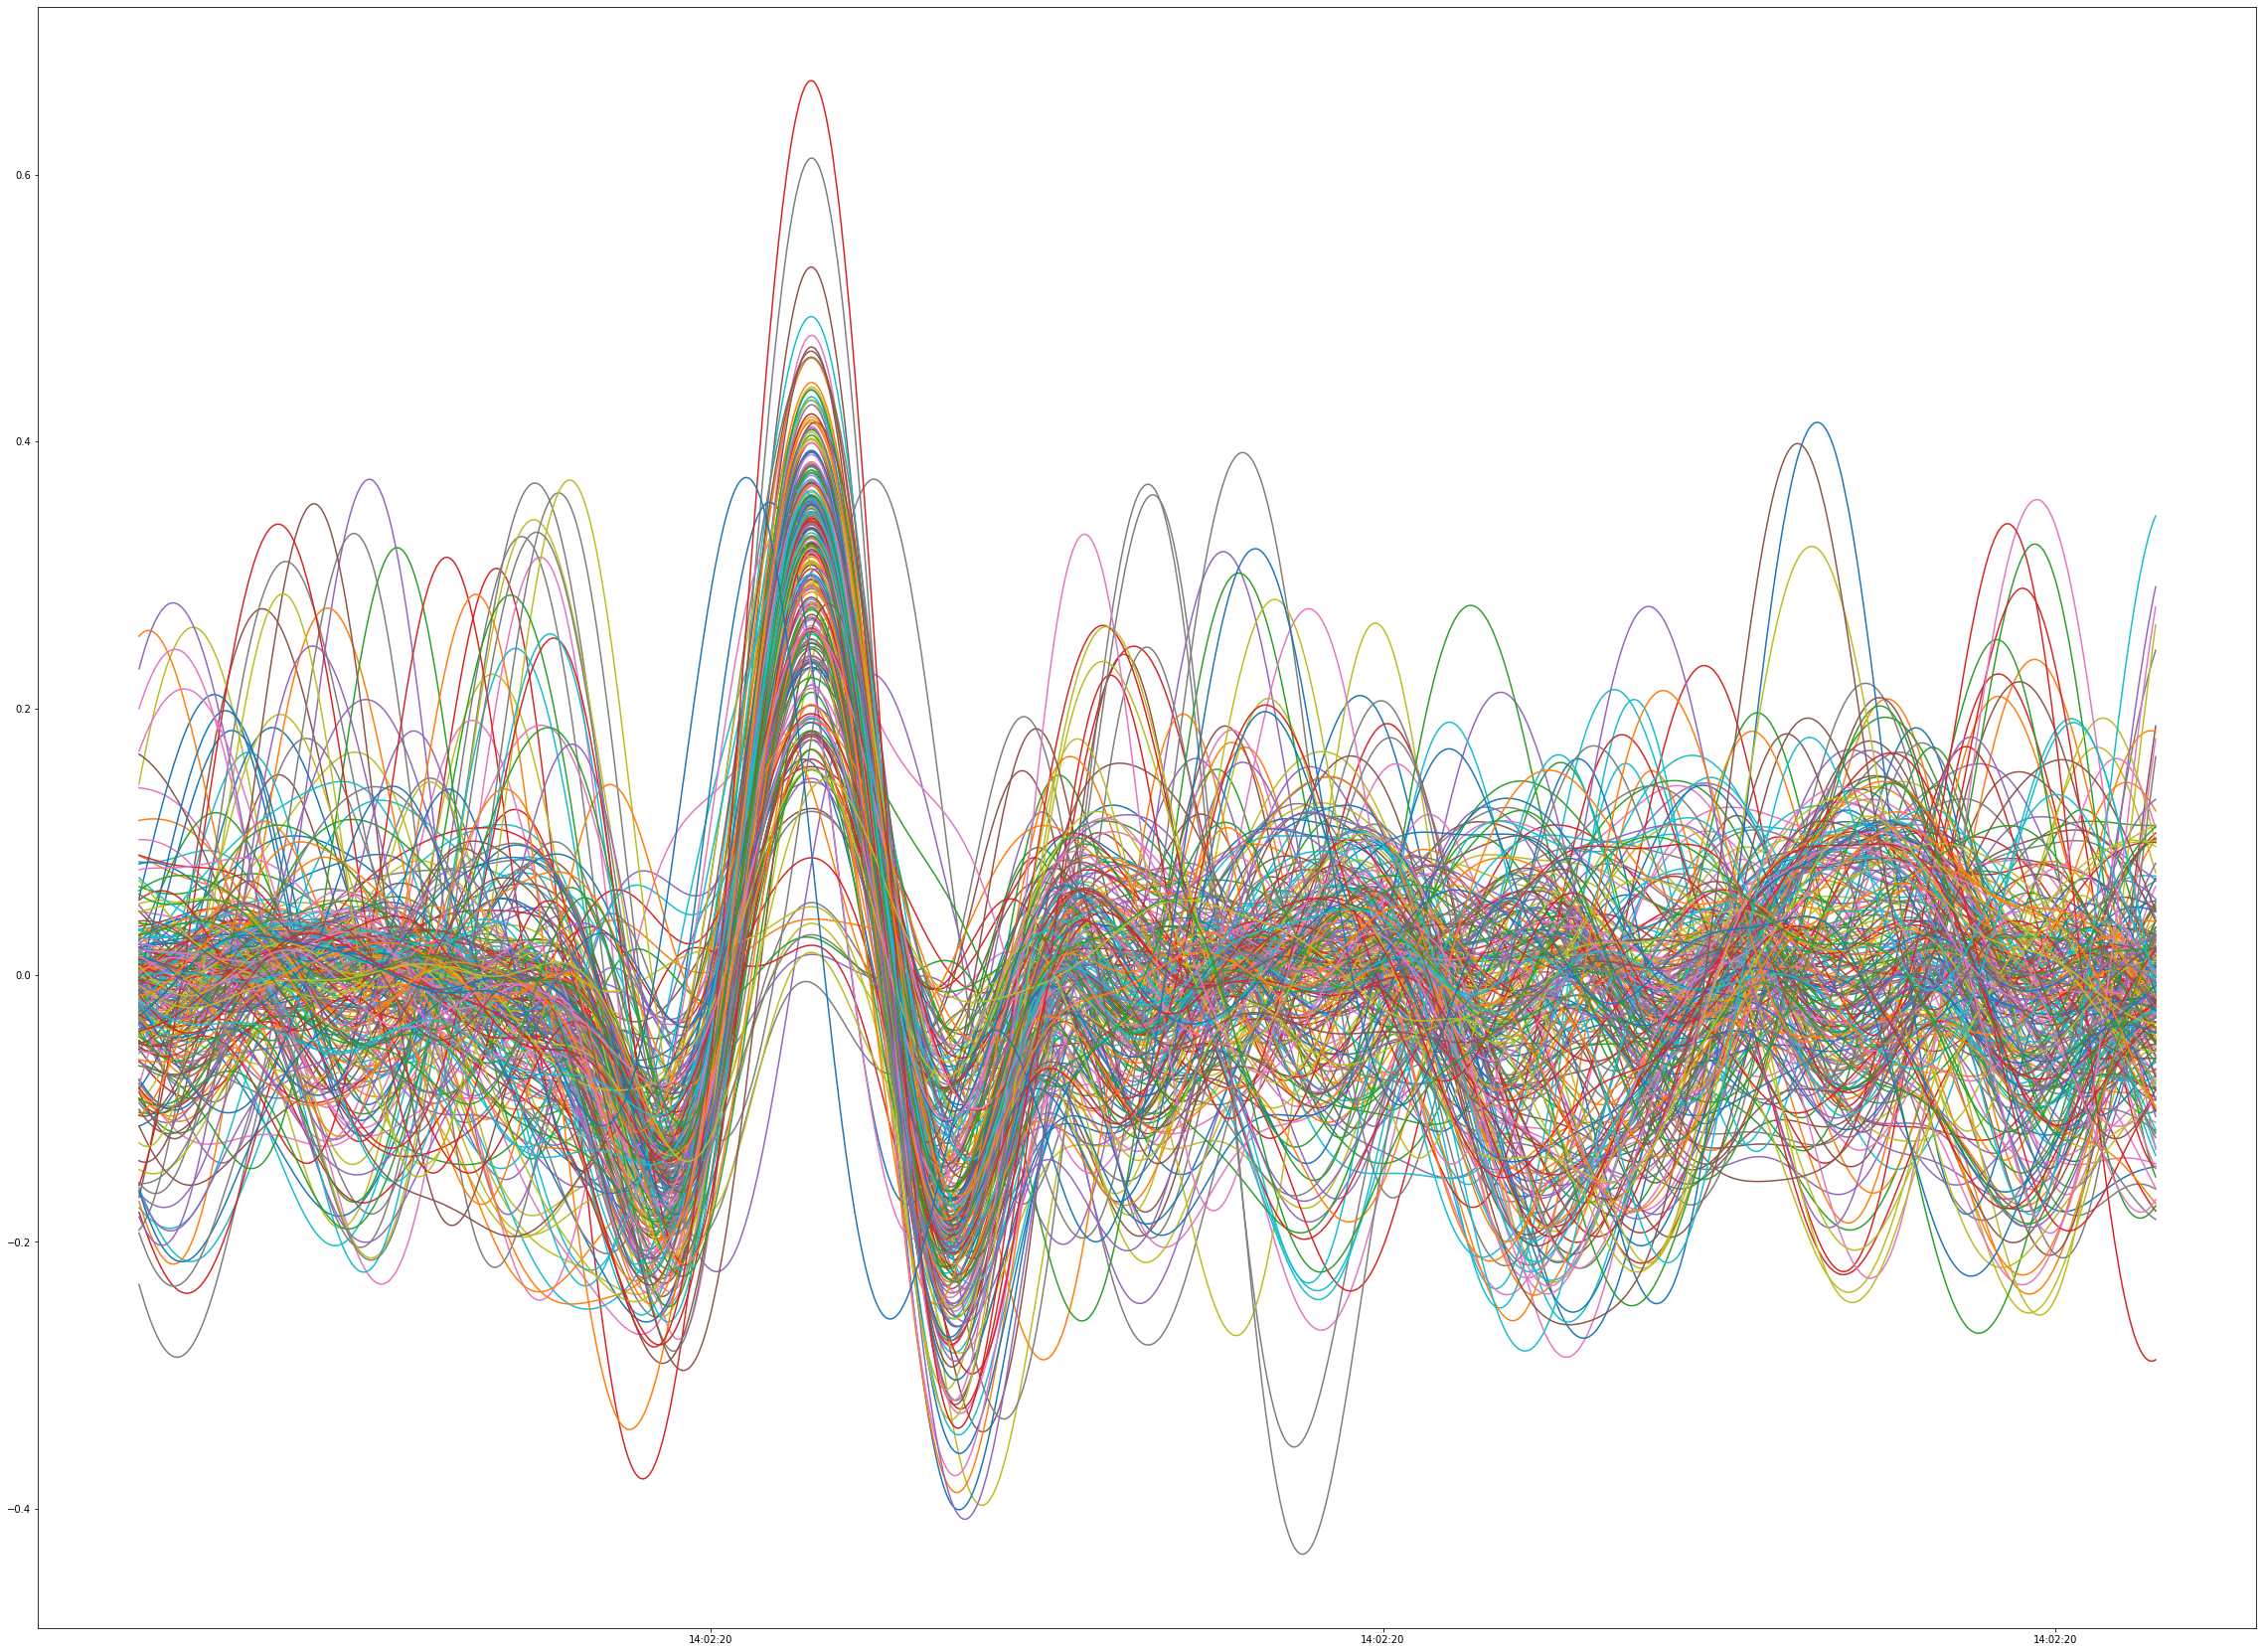

In [6]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

cardiac_cycles=ecg_target_df['Cardiac_Cycles']
plt.plot(cardiac_cycles)

In [ ]:
cardiac_cycles_inv = cardiac_cycles.transpose()
mean_cc = np.mean(cardiac_cycles_inv)
plt.plot(mean_cc)

In [ ]:
a = list(cardiac_cycles[:][0])


In [ ]:
a?

## Visualization with dash-plotly

In [7]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from jupyter_plotly_dash import JupyterDash


In [8]:

        import pandas as pd
import plotly.graph_objs as go


app = JupyterDash("app2")

app.layout = html.Div([
    dcc.Graph(id='graph-with-slider'),
    dcc.Slider(
        id='observation-slider',
        min=0,
        max=244,
        value=5
    )
])

#marks={str(observations): str(observations) for observations in cardiac_cycles.unique()

@app.callback(
    Output('graph-with-slider', 'figure'),
    [Input('observation-slider', 'value')])
def update_figure(selected_nb_observation):
    #filtered_df = df[df.cardiac_cycles == selected_nb_observation
    trace = go.Line(
            x=list(np.linspace(0,2,3000)),
            y=list(cardiac_cycles[:][selected_nb_observation]),
            opacity=0.7
        )

    fig = go.Figure(data=[trace])
    return fig 
        

app

In [9]:
import pandas as pd
import plotly.graph_objs as go
from scipy.stats import sem


app = JupyterDash("app2")

app.layout = html.Div([
    dcc.Graph(id='graph-with-slider'),
    dcc.Slider(
        id='observation-slider',
        min=1,
        max=244,
        value=5
    )
])

#marks={str(observations): str(observations) for observations in cardiac_cycles.unique()

@app.callback(
    Output('graph-with-slider', 'figure'),
    [Input('observation-slider', 'value')])
def update_figure(selected_nb_observation):
    #filtered_df = df[df.cardiac_cycles == selected_nb_observation
    trace = go.Line(
            x=list(np.linspace(0,2,3000)),
            y=list(np.average(cardiac_cycles[:].T[0:selected_nb_observation], axis=0)),
            opacity=0.7
        )

    fig = go.Figure(data=[trace])
    return fig 
        

app

In [ ]:
import pandas as pd
import plotly.graph_objs as go
from scipy.stats import sem


app = JupyterDash("app2")

app.layout = html.Div([
    dcc.Graph(id='graph-with-slider'),
    dcc.Slider(
        id='observation-slider',
        min=1,
        max=244,
        value=5
    )
])

#marks={str(observations): str(observations) for observations in cardiac_cycles.unique()

@app.callback(
    Output('graph-with-slider', 'figure'),
    [Input('observation-slider', 'value')])
def update_figure(selected_nb_observation):
    #filtered_df = df[df.cardiac_cycles == selected_nb_observation
    trace = go.Line(
            x=list(np.linspace(0,2,3000)),
            y=list(sem(cardiac_cycles[:].T[0:selected_nb_observation], axis=0)),
            opacity=0.7
        )

    fig = go.Figure(data=[trace])
    return fig 
        

app

In [ ]:
sem(cardiac_cycles[:][:3])

In [ ]:
cardiac_cycles[:].T[0:5].shape

In [ ]:
app = JupyterDash("app3")

app.layout = html.Div([
    dcc.Graph(id='graph-with-slider'),
    dcc.Slider(
        id='observation-slider',
        min=1,
        max=245,
        value=5
    )
])

#marks={str(observations): str(observations) for observations in cardiac_cycles.unique()

@app.callback(
    Output('graph-with-slider', 'figure'),
    [Input('observation-slider', 'value')])
def update_figure(selected_nb_observation):
    traces = []
    for i in range(seleceted_nb_observation):
        traces.append(go.Line(
                x=list(np.linspace(0,2,3000)),
                y=list(cardiac_cycles[:][i]),
                opacity=0.7
            ))

    fig = go.Figure(data=traces)
    return fig 
        

app

In [ ]:
trace = go.Line(
            x=list(np.linspace(0,2,3000)),
            y=list(cardiac_cycles[:][1]),
            opacity=0.7
        )

In [ ]:
len(cardiac_cycles)

In [ ]:
traces = []
for i in range(200):
    traces.append(go.Line(
            x=list(np.linspace(0,2,len(cardiac_cycles))),
            y=list(cardiac_cycles[:][i]),
            opacity=0.9
        ))

fig = go.Figure(data=traces)


fig.show()